# kaggle共享单车项目可视化报告

## 一、项目背景
   kaggle网站共享单车项目提供了美国某城市的共享单车2011年到2012年的数据集，该数据包括了租车日期，租车季节，租车气温，租车空气湿度等数据。

## 二、项目目标
   对数据进行清洗，计算描述性统计数据，并实现数据的基本可视化（注：不要求用机器学习模型）

## 三、开始项目

### 1，提出问题
通过历史租车数据并结合天气数据来预测租车需求

### 2，理解数据
首先导入我们需要的各种包：

In [1]:
import numpy as np
import pandas as pd
import calendar
import seaborn as sn
import matplotlib.pyplot as plt

C:\Users\47498\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:1060: UserWarning: Illegal line #170
	"font.family may also be one or more concrete font names.
"
	in file "C:\Users\47498\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\mpl-data\matplotlibrc"
  warnings.warn('Illegal %s' % error_details)


将官网下载的两个数据表train.csv和test.csv读入，并观察

In [2]:
#查看数据大小
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
print('训练数据集：',train.shape,'测试数据集:',test.shape)

训练数据集： (10886, 12) 测试数据集: (6493, 9)


In [3]:
#查看数据情况
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


比较两个表，我们可以知道test比train少了“casual”，“registered”，“count”三个字段

In [5]:
#查看数据总体信息
print('训练集数据信息: ',train.info(),'测试集数据信息: ',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     64

数据比较好，都没有缺失，所以后面不需要进行填补

字段说明：

datetime：时间

season：季节，1=春，2=夏，3=秋，4=冬

holiday：节假日，0：否，1：是

workingday：工作日，0：否，1：是

weather：天气，1:晴天，2:阴天 ，3:小雨或小雪 ，4:恶劣天气（大雨、冰雹、暴风雨或者大雪）

temp：实际温度，摄氏度

atemp：体感温度，摄氏度

humidity：湿度，相对湿度

windspeed：风速

casual：未注册用户租借数量

registered：注册用户租借数量

count：总租借数量

### 3.数据清洗

#### 1）数据预处理
由于数据完整，不需要进行预处理

#### 2）数据特征提取
虽然我不会骑单车T.T,但是结合我的日常观察，共享单车的租借会和以下因素有关系：月份、日期、时间、季节、天气、温度、湿度、风速。
我的感觉对不对呢？我们来验证一下，hoho~

##### 时间特征处理

In [100]:
#时间特征处理  "2011-01-20 00:00:00"时间字段的格式是这样的，日期+时间
#创建一个新的表框
periodDf=train[['datetime','season','holiday','workingday','count']]
#避免报错
periodDf.is_copy = None
#日期处理，把日期提取出来（用匿名函数分离出来）
periodDf['date']=periodDf['datetime'].apply(lambda x: x.split()[0])
periodDf['time']=periodDf['datetime'].apply(lambda x: x.split()[1])
periodDf['year']=periodDf['date'].apply(lambda x: x.split('-')[0])
periodDf['month']=periodDf['date'].apply(lambda x: x.split('-')[1])
periodDf['day']=periodDf['date'].apply(lambda x: x.split('-')[2])
periodDf['hour']=periodDf['time'].apply(lambda x: x.split(':')[0])
#星期
periodDf['weekday']=periodDf['datetime'].apply(lambda x: pd.to_datetime(x).weekday())
#看看处理后的periodDf
periodDf.head()

C:\Users\47498\AppData\Local\conda\conda\envs\my_root\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\47498\AppData\Local\conda\conda\envs\my_root\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


,datetime,season,holiday,workingday,count,date,time,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,16,2011-01-01,00:00:00,2011,01,01,00,5
1,2011-01-01 01:00:00,1,0,0,40,2011-01-01,01:00:00,2011,01,01,01,5
2,2011-01-01 02:00:00,1,0,0,32,2011-01-01,02:00:00,2011,01,01,02,5
3,2011-01-01 03:00:00,1,0,0,13,2011-01-01,03:00:00,2011,01,01,03,5
4,2011-01-01 04:00:00,1,0,0,1,2011-01-01,04:00:00,2011,01,01,04,5


(0, 11)

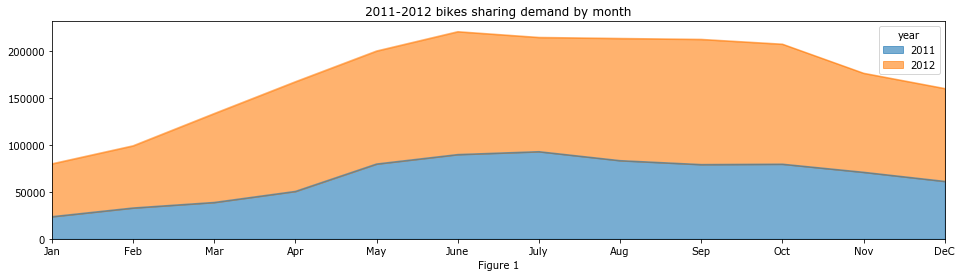

In [128]:
#绘图
fig1=plt.figure(figsize=(16,4))
ax1=plt.subplot(111)
df1=periodDf.groupby(['month','year']).sum().unstack()['count']#unstack(),将列索引变为行索引
df1.plot(kind='area',ax=ax1,alpha=0.6)
ax1.set_title('2011-2012 bikes sharing demand by month')
ax1.set_xlabel('Figure 1')
ax1.set_xticks(list(range(12)))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','DeC'])
ax1.set_xlim(0,11)

通过上图分析：我们可以看到2012年共享单车的租借数量比2011年是有提升的，一年中6-10月是租借的高峰期。

(0, 800)

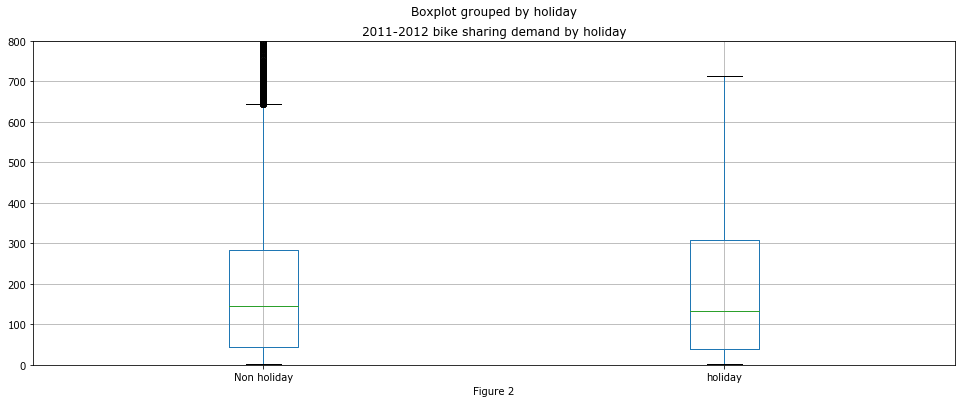

In [130]:
fig2=plt.figure(figsize=(16,6))
ax2=plt.subplot(111)
df2=periodDf[['count','holiday']]
df2.boxplot(by='holiday',ax=ax2)
ax2.set_title('2011-2012 bike sharing demand by holiday')
ax2.set_xlabel('Figure 2')
ax2.set_xticklabels(['Non holiday','holiday'],rotation='horizontal')
ax2.set_ylim(0,800)

通过上图可知，节假日和非节假日租车情况差不多。

(0, 800)

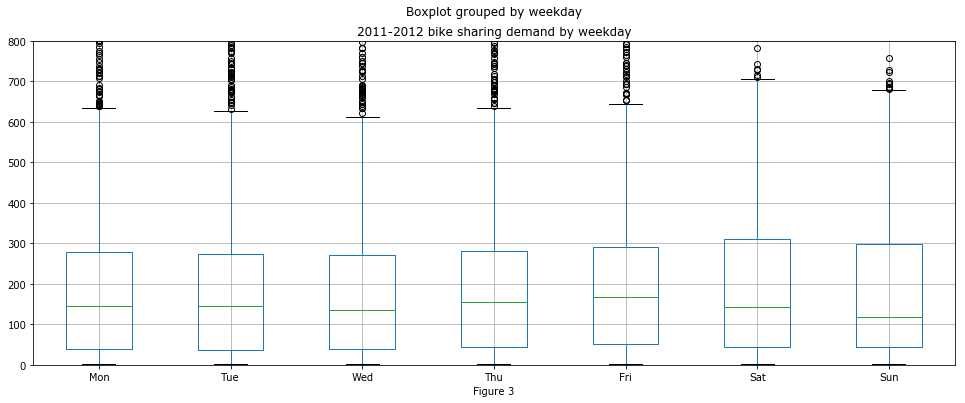

In [127]:
fig3=plt.figure(figsize=(16,6))
ax3=plt.subplot(111)
df3=periodDf[['count','weekday']]
df3.boxplot(by='weekday',ax=ax3)
ax3.set_title('2011-2012 bike sharing demand by weekday')
ax3.set_xlabel('Figure 3')
ax3.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
ax3.set_ylim(0,800)

由上图可知，工作日租车数量基本持平，周末和工作日相差并不大

(0, 23)

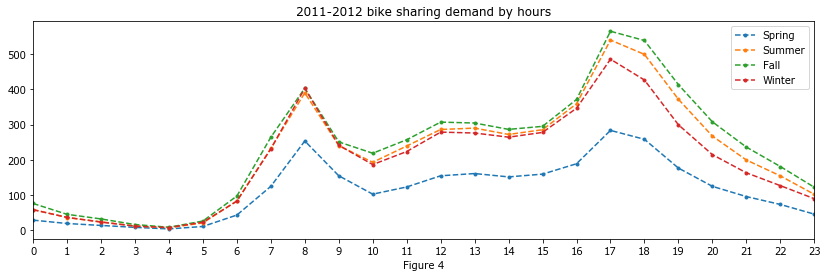

In [122]:
fig4=plt.figure(figsize=(14,4))
ax4=plt.subplot(111)
df4=periodDf.groupby(['hour', 'season']).mean().unstack()['count']
df4.columns=['Spring','Summer','Fall','Winter']
df4.plot(ax=ax4, style='--.')
ax4.set_title('2011-2012 bike sharing demand by hours')
ax4.set_xlabel('Figure 4')
ax4.set_xticks(list(range(24)))
ax4.set_xticklabels(list(range(24)))
ax4.set_xlim(0,23)

由上图可知，租车数量随季节变化趋势大体是一致的，春天租车最少，冬天最多。早高峰（7-9时）和晚高峰（16-19时）租车数量增加显著

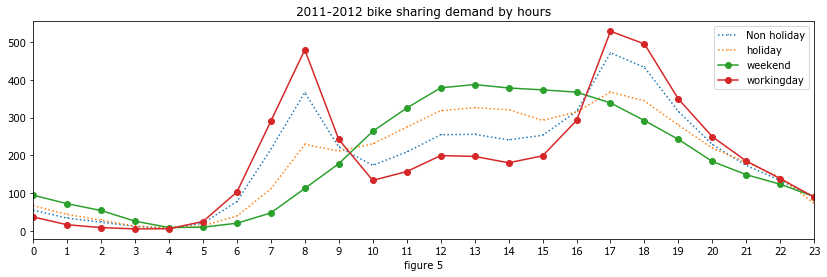

In [123]:
fig5=plt.figure(figsize=(14,4))
ax5=plt.subplot(111)
df51=periodDf.groupby(['hour','holiday']).mean().unstack()['count'].rename(columns={0:'Non holiday',1:'holiday'})
df52=periodDf.groupby(['hour','workingday']).mean().unstack()['count'].rename(columns={0:'weekend',1:'workingday'})
df51.plot(ax=ax5,style=':,')
df52.plot(ax=ax5,style='-o')
ax5.set_title('2011-2012 bike sharing demand by hours')
ax5.set_xlabel('figure 5')
ax5.set_xticks(list(range(24)))
ax5.set_xticklabels(list(range(24)))
ax5.set_xlim(0,23)
ax5.legend()
plt.show()

由上图可知，节假日和非节假日影响不大。工作日和周末用车的时段呈递相反趋势，工作日集中在早晚高峰，周末集中在10-16时。

##### 非时间特征处理
天气 温度 湿度 风速

In [60]:
#天气、温度、湿度、风速信息统计
climateDf=train[['weather','temp','atemp','humidity','windspeed','count']]
climateDf=pd.concat([climateDf,periodDf['hour']],axis=1)

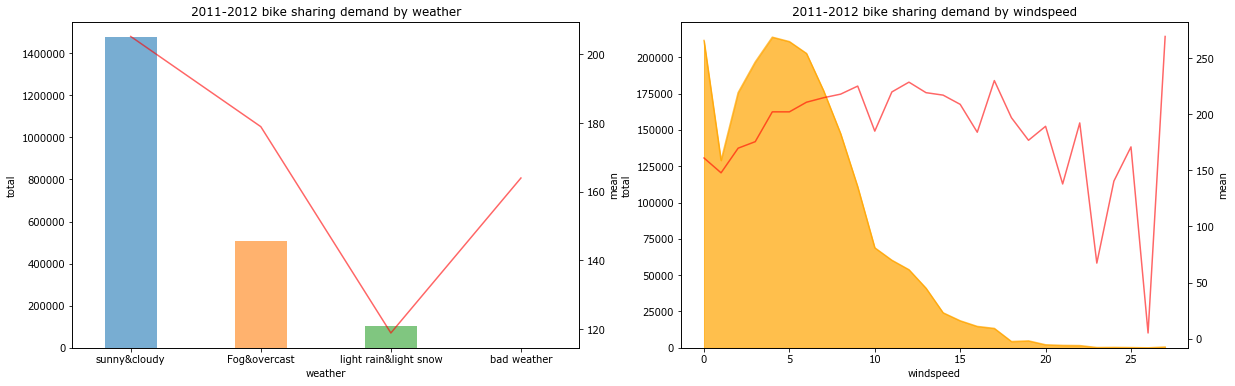

In [92]:
#查看天气和风速对租车数量的影响
fig,axes=plt.subplots(1,2,figsize=(20,6))
ax6=plt.subplot(1,2,1)
df11=climateDf.groupby('weather').sum()['count']
df12=climateDf.groupby('weather').mean()['count']
df1=pd.concat([df11,df12],axis=1).reset_index()
df1.columns=['weather','sum','mean']
df1['sum'].plot(kind='bar',width=0.4,ax=ax6,alpha=0.6,label='')
df1['mean'].plot(style='r-',alpha=0.6,ax=ax6,secondary_y=True,label='mean')
ax6.set_xlabel('weather')
ax6.set_xticks(df1.index)
ax6.set_xticklabels(['sunny&cloudy','Fog&overcast','light rain&light snow','bad weather'], rotation='horizontal')
ax6.set_ylabel('total')
ax6.right_ax.set_ylabel('mean')
ax6.set_title('2011-2012 bike sharing demand by weather')

ax7=plt.subplot(1,2,2)
df21=climateDf.groupby('windspeed').sum()['count']
df22=climateDf.groupby('windspeed').mean()['count']
df2=pd.concat([df21,df22],axis=1).reset_index()
df2.columns=['windspeed','sum','mean']
df2['sum'].plot(kind='area',ax=ax7,alpha=0.7,color='orange',label='')
df2['mean'].plot(style='-',alpha=0.6,color='red',ax=ax7,secondary_y=True,label='mean')
ax7.set_xlabel('windspeed')
ax7.set_ylabel('total')
ax7.right_ax.set_ylabel('mean')
ax7.set_title('2011-2012 bike sharing demand by windspeed')
plt.show()

上面左图柱状图反应了不同天气下租车总数的变化，大雨大雪大雾这种恶劣天气最低。折现图反应了各种天气下平均租车数量，异常的是平均数量在恶劣天气下反而显著增加；

上面右图反应了随着风速变大，租车的总数量趋向于0，但平均租车数却最高。

In [86]:
train[train['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [88]:
train[train['windspeed']>50]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
760,2011-02-15 01:00:00,1,0,1,1,12.30,12.12,42,51.9987,0,5,5
868,2011-02-19 15:00:00,1,0,0,1,18.04,21.97,16,50.0021,84,87,171
2755,2011-07-03 17:00:00,3,0,0,3,32.80,37.12,49,56.9969,181,177,358
2756,2011-07-03 18:00:00,3,0,0,3,32.80,37.12,49,56.9969,74,107,181


通过查看原始数据发现，这种极端情况的数据仅为个例，所以造成了异常现象

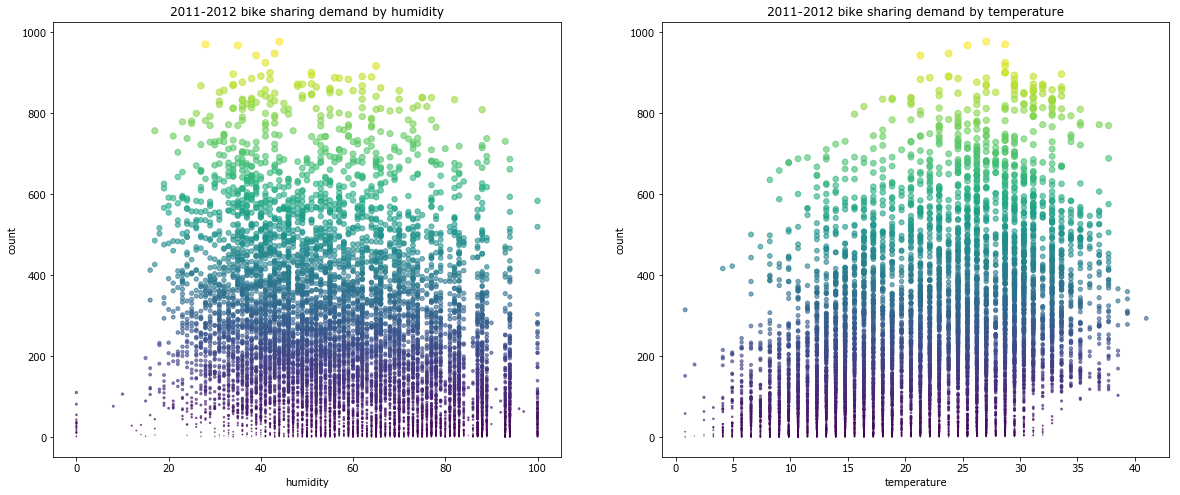

In [131]:
#查看湿度、温度对租车数量的影响
fig=plt.subplots(1,2,figsize=(20,8))

ax1=plt.subplot(1,2,1)
df1=climateDf[['humidity','count']]
ax1.scatter(df1['humidity'],df1['count'],s=df1['count']/5, c=df1['count'],marker='.',alpha=0.6)
ax1.set_title('2011-2012 bike sharing demand by humidity')
ax1.set_xlabel('humidity')
ax1.set_ylabel('count')

ax2=plt.subplot(1,2,2)
df2=climateDf[['temp','count']]
ax2.scatter(df2['temp'],df2['count'],s=df1['count']/5, c=df1['count'],marker='.',alpha=0.6)
ax2.set_title('2011-2012 bike sharing demand by temperature')
ax2.set_xlabel('temperature')
ax2.set_ylabel('count')
plt.show()

最适合的湿度为30-40附近，温度越高，租车数量减少，最适合的温度在25-30左右

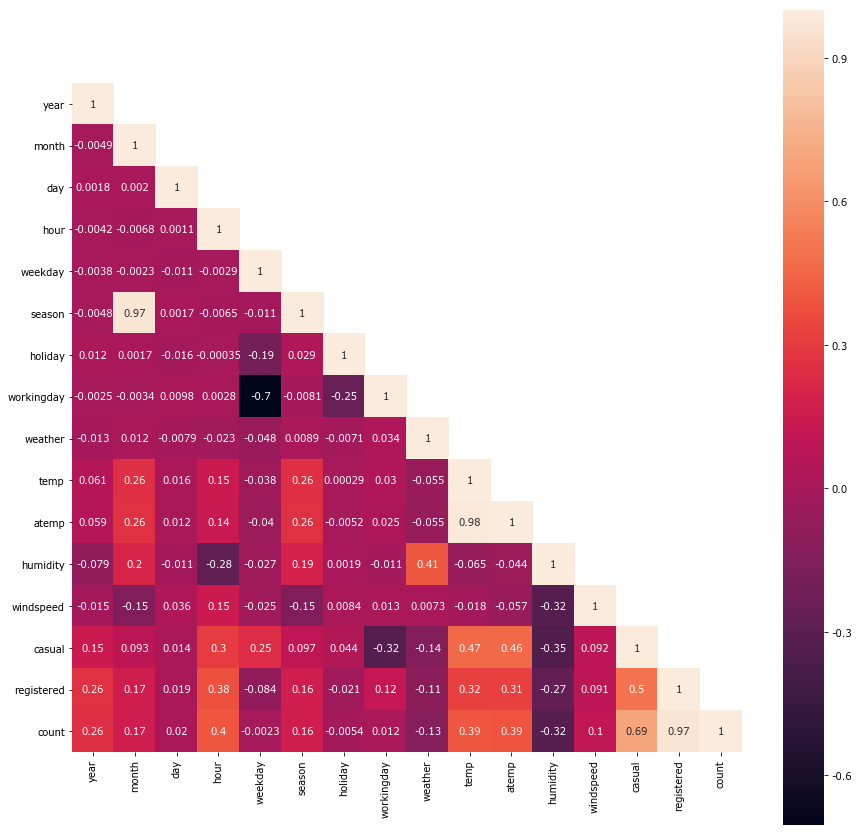

In [107]:
#查看租车数量和其它变量的相关性
df=pd.concat([periodDf.iloc[:,-5:].astype(int),train.iloc[:,1:]],axis=1)
corrDf=df.corr()
mask=np.array(corrDf)
mask[np.tril_indices_from(mask)]=False
fig=plt.figure(figsize=(15,15))
sn.heatmap(corrDf,mask=mask,annot=True,square=True)
plt.show()